In [3]:
!pip install -r requirements.txt

# **Import modules**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

ModuleNotFoundError: No module named 'pandas'

# **Load Dataset**

In [187]:
df = pd.read_csv("./dataset/used_device_data.csv")

In [188]:
df.head()

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [189]:
df.describe()

,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454.000000,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,4.364712,5.233107
std,3.805280,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,0.588914,0.683637
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,6.619433,7.847841


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   rear_camera_mp         3275 non-null   float64
 6   front_camera_mp        3452 non-null   float64
 7   internal_memory        3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [191]:
df.columns

Index(['device_brand', 'os', 'screen_size', '4g', '5g', 'rear_camera_mp',
       'front_camera_mp', 'internal_memory', 'ram', 'battery', 'weight',
       'release_year', 'days_used', 'normalized_used_price',
       'normalized_new_price'],
      dtype='object')

In [192]:
df.shape

(3454, 15)

# **Exploratory Data Analysis**

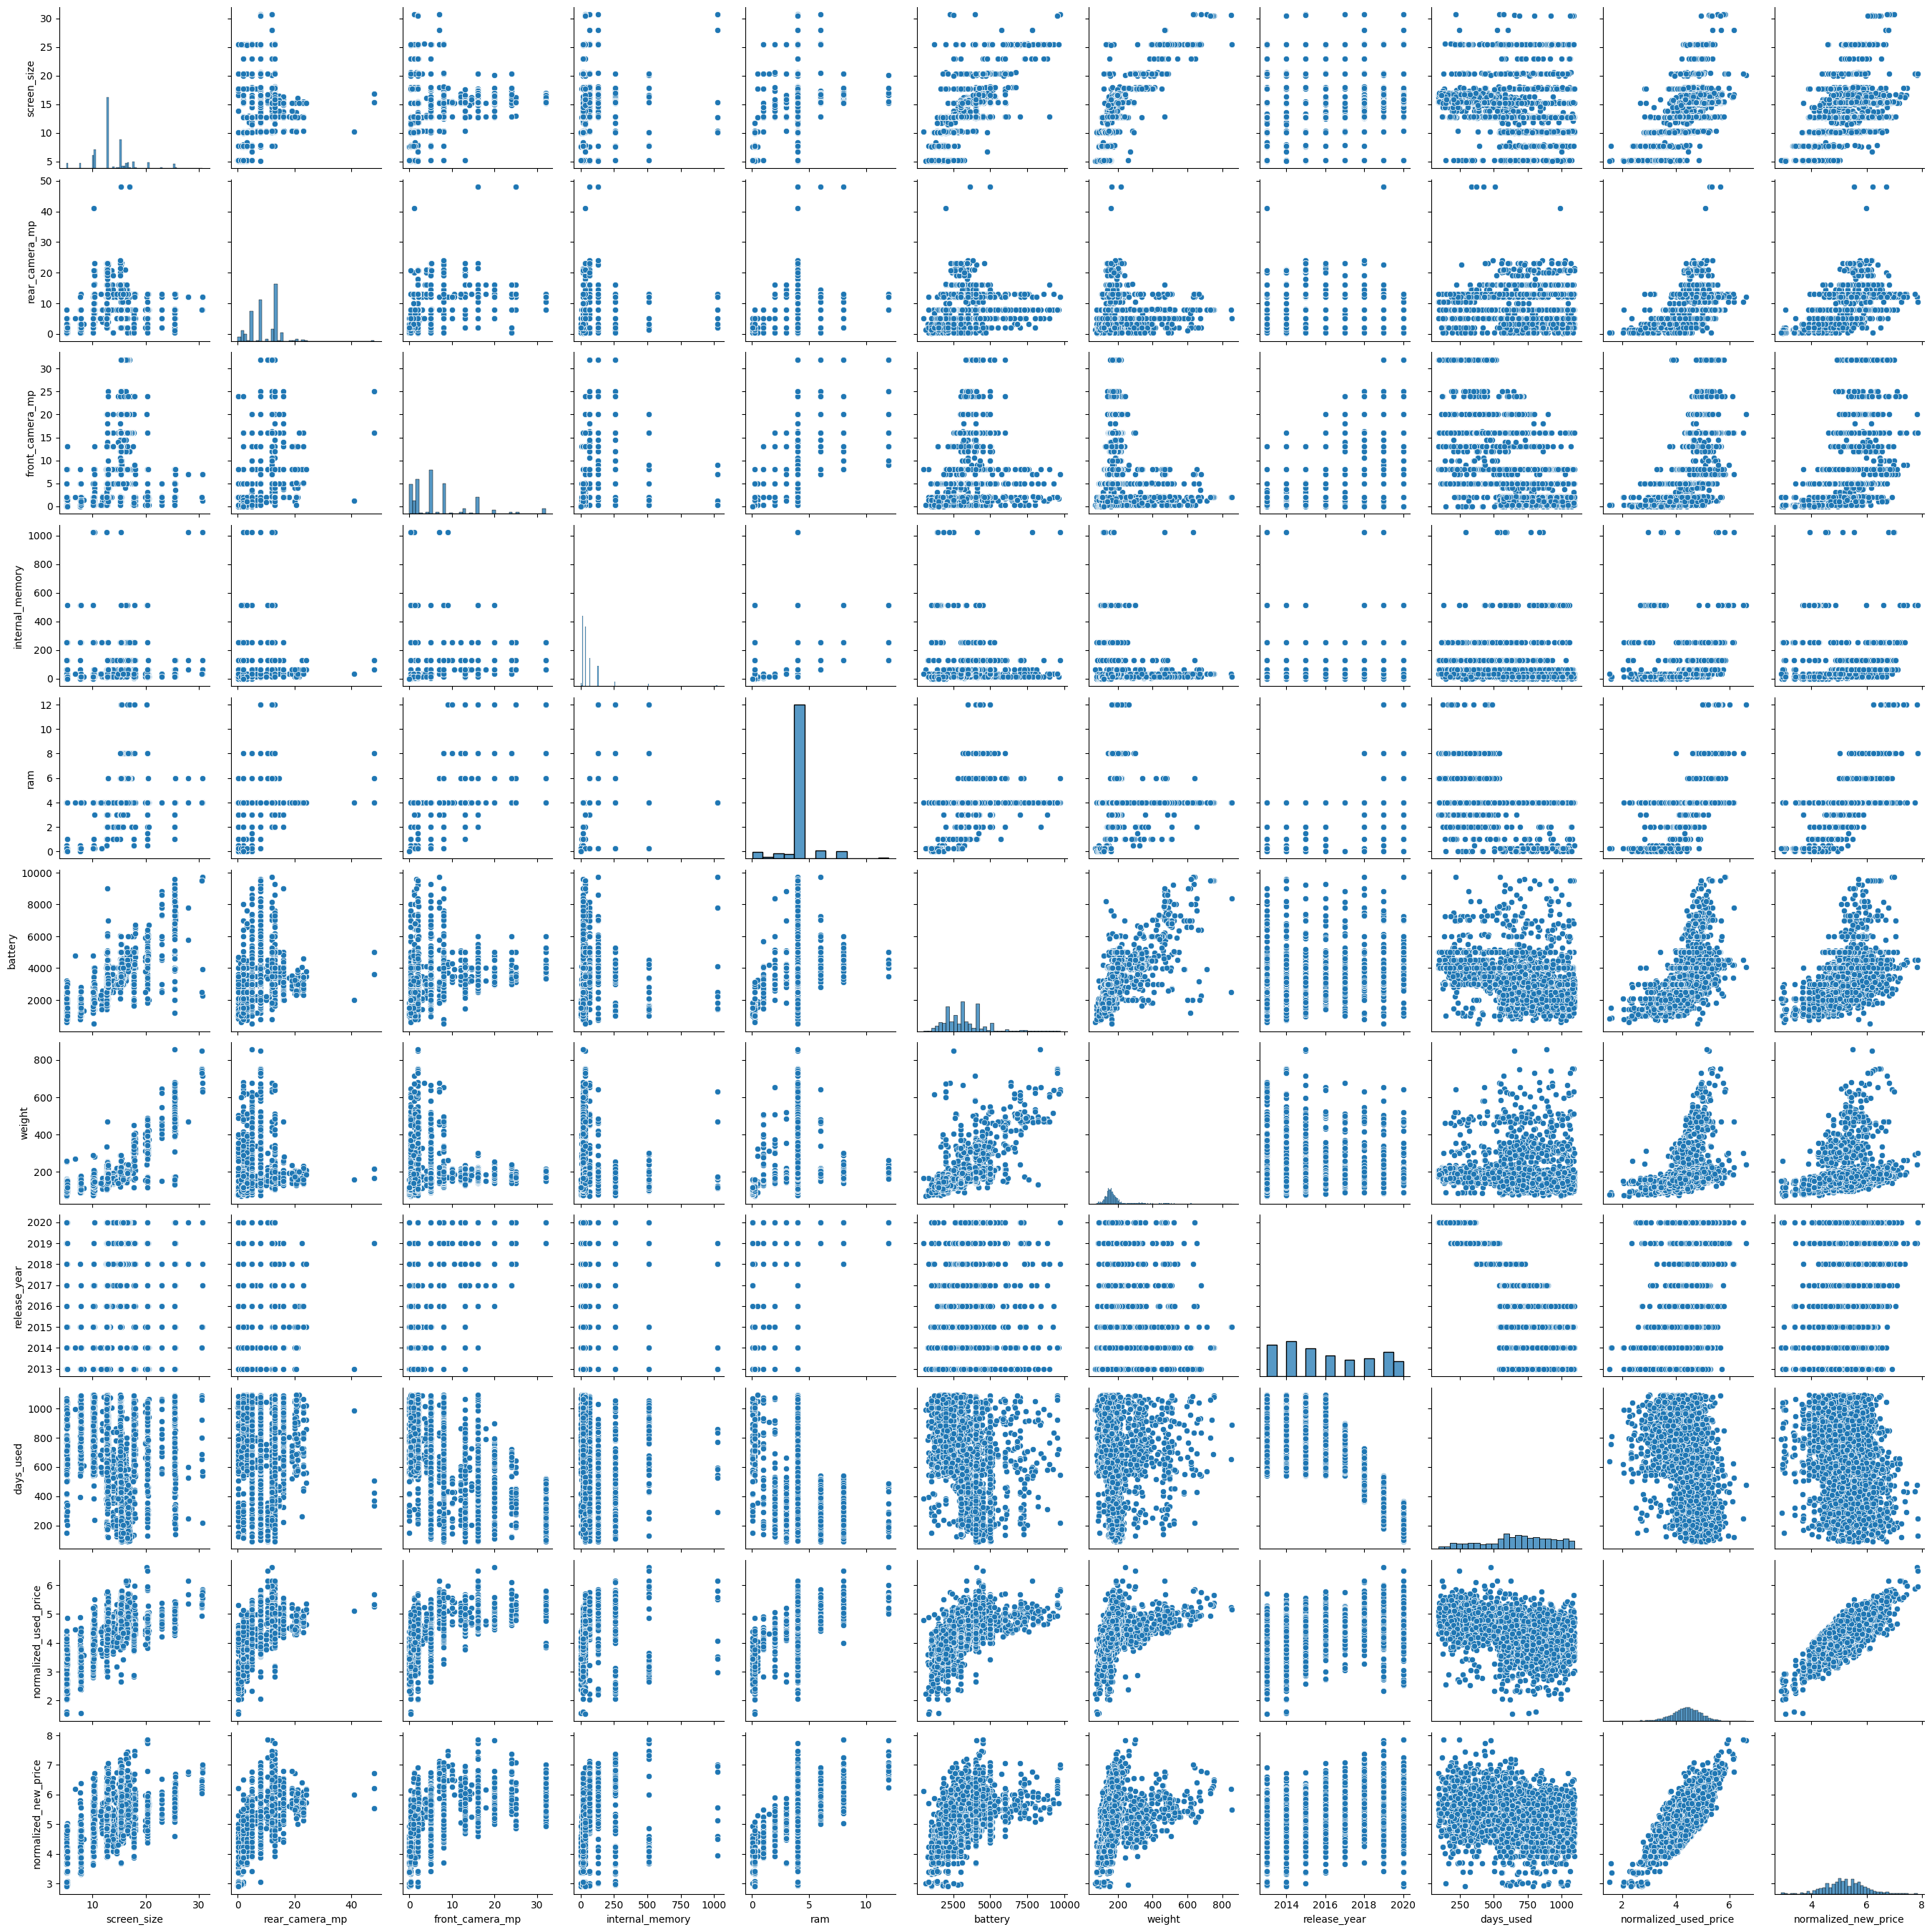

In [193]:
sns.pairplot(df)

In [194]:
df.corr(method="pearson",numeric_only = True)

,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
screen_size,1.000000,0.150316,0.271640,0.071291,0.274449,0.813533,0.828890,0.364223,-0.291723,0.614785,0.460889
rear_camera_mp,0.150316,1.000000,0.429264,0.018766,0.260802,0.248563,-0.087738,0.353728,-0.144672,0.587302,0.541655
front_camera_mp,0.271640,0.429264,1.000000,0.296426,0.477411,0.369709,-0.004997,0.690942,-0.552636,0.608074,0.475479
internal_memory,0.071291,0.018766,0.296426,1.000000,0.122496,0.117736,0.014948,0.235429,-0.242712,0.190993,0.195992
ram,0.274449,0.260802,0.477411,0.122496,1.000000,0.280740,0.089916,0.314203,-0.280066,0.520289,0.532056
battery,0.813533,0.248563,0.369709,0.117736,0.280740,1.000000,0.703388,0.488660,-0.370895,0.613619,0.470754
weight,0.828890,-0.087738,-0.004997,0.014948,0.089916,0.703388,1.000000,0.071290,-0.067470,0.382354,0.269540
release_year,0.364223,0.353728,0.690942,0.235429,0.314203,0.488660,0.071290,1.000000,-0.750390,0.509790,0.303689
days_used,-0.291723,-0.144672,-0.552636,-0.242712,-0.280066,-0.370895,-0.067470,-0.750390,1.000000,-0.358264,-0.216625
normalized_used_price,0.614785,0.587302,0.608074,0.190993,0.520289,0.613619,0.382354,0.509790,-0.358264,1.000000,0.834496


# **Check Dataframe for null Values**

In [195]:
df.isnull()

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3450,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3451,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3452,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [196]:
df.isnull().sum()

,0
device_brand,0
os,0
screen_size,0
4g,0
5g,0
rear_camera_mp,179
front_camera_mp,2
internal_memory,4
ram,4
battery,6


# **Drop values**

In [197]:
df1 = df.dropna()

In [198]:
df1.shape

(3253, 15)

In [199]:
df.shape

(3454, 15)

In [200]:
df1.head()

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [201]:
df1.isnull().sum()

,0
device_brand,0
os,0
screen_size,0
4g,0
5g,0
rear_camera_mp,0
front_camera_mp,0
internal_memory,0
ram,0
battery,0


In [202]:
df1.columns

Index(['device_brand', 'os', 'screen_size', '4g', '5g', 'rear_camera_mp',
       'front_camera_mp', 'internal_memory', 'ram', 'battery', 'weight',
       'release_year', 'days_used', 'normalized_used_price',
       'normalized_new_price'],
      dtype='object')

# **Transform Categorical Values**

In [203]:
label_enc = LabelEncoder()
df1["4g_v2"] = label_enc.fit_transform(df1["4g"])
df1["5g_v2"] = label_enc.fit_transform(df1["5g"])
df1

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,4g_v2,5g_v2
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100,1,0
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018,1,1
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631,1,1
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961,1,1
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3447,Apple,iOS,15.27,yes,no,8.0,7.0,64.0,4.0,3110.0,194.0,2019,208,5.100902,6.287933,1,0
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538,1,0
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829,1,0
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188,1,0


In [204]:
# df1["4g_v3"] = df1["4g"].apply(lambda x: 1 if x=="yes" else 0)

In [205]:
# df1.head()

In [206]:
# df1["5g_v3"] =df1["5g"].apply(lambda x: 1 if x=="yes" else 0)

In [207]:
# df1.head()

In [208]:
brand_dict = df1.groupby(['device_brand'])['normalized_used_price'].median().to_dict()
brand_dict

{'Acer': 4.294424174,
 'Alcatel': 4.026422546,
 'Apple': 5.011901159,
 'Asus': 4.4673986215,
 'BlackBerry': 4.2931666795000005,
 'Celkon': 3.116621591,
 'Coolpad': 4.243339115,
 'Gionee': 4.349177705,
 'Google': 4.870146421,
 'HTC': 4.432936787999999,
 'Honor': 4.6833263,
 'Huawei': 4.69015451,
 'Karbonn': 3.654546775,
 'LG': 4.322143925,
 'Lava': 3.9323964145000003,
 'Lenovo': 4.423648309,
 'Meizu': 4.533451438,
 'Micromax': 3.867443962,
 'Microsoft': 4.195245147,
 'Motorola': 4.38256042,
 'Nokia': 4.052654135,
 'OnePlus': 4.679163866,
 'Oppo': 4.69701984,
 'Others': 4.2107191964999995,
 'Panasonic': 4.282206299,
 'Realme': 4.668802046,
 'Samsung': 4.51008998,
 'Sony': 4.527100531,
 'Spice': 3.6704561995000002,
 'Vivo': 4.761831996,
 'XOLO': 3.947337803,
 'Xiaomi': 4.630935394,
 'ZTE': 4.360214212500001}

In [209]:
df1['Device_Brand'] = df1['device_brand'].map(brand_dict)

In [210]:
df1.head()

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,4g_v2,5g_v2,Device_Brand
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100,1,0,4.683326
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018,1,1,4.683326
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631,1,1,4.683326
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961,1,1,4.683326
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837,1,0,4.683326


# **Create Train, Test Dataset**



In [211]:
y=df1["normalized_used_price"]
y.head()

,normalized_used_price
0,4.307572
1,5.162097
2,5.111084
3,5.135387
4,4.389995


In [212]:
x = df1.drop(["device_brand", "os", "4g", "5g","normalized_used_price" ], axis=1)
x

,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_new_price,4g_v2,5g_v2,Device_Brand
0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.715100,1,0,4.683326
1,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.519018,1,1,4.683326
2,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.884631,1,1,4.683326
3,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.630961,1,1,4.683326
4,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.947837,1,0,4.683326
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3447,15.27,8.0,7.0,64.0,4.0,3110.0,194.0,2019,208,6.287933,1,0,5.011901
3450,15.24,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,6.251538,1,0,4.467399
3451,15.80,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.528829,1,0,4.026423
3452,15.80,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.624188,1,0,4.026423


# **Split the Dataset**

In [213]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.3)

In [214]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.3)

In [215]:
x_test

,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_new_price,4g_v2,5g_v2,Device_Brand
1973,12.88,13.0,5.0,16.0,4.0,4000.0,174.0,2018,426,5.010635,1,0,4.382560
1418,12.70,16.0,8.0,16.0,4.0,2000.0,134.0,2014,920,5.386237,0,0,3.654547
1959,10.16,2.0,0.3,32.0,4.0,1560.0,134.1,2015,708,4.228438,0,0,4.195245
1449,12.70,13.0,5.0,16.0,4.0,2900.0,133.0,2015,1013,5.005288,1,0,3.932396
377,16.59,2.0,16.0,64.0,4.0,4000.0,193.0,2020,168,5.435990,1,0,4.210719
...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,10.29,8.0,1.3,16.0,4.0,1800.0,148.0,2013,608,5.562181,0,0,4.210719
2885,12.70,5.0,2.0,32.0,4.0,2200.0,169.0,2017,686,4.378270,1,0,4.210719
2429,12.83,13.0,5.0,16.0,4.0,3300.0,169.0,2016,684,5.287812,1,0,4.510090
133,15.39,8.0,16.0,256.0,8.0,4065.0,215.0,2019,392,6.780831,1,1,4.697020


In [216]:
y_train

,normalized_used_price
2830,4.747017
2792,4.178686
57,3.579344
1463,4.004237
814,3.925137
...,...
850,4.646696
922,4.733827
1743,3.354106
2719,3.390136


In [217]:
y_test

,normalized_used_price
1973,4.369068
1418,4.482437
1959,3.640214
1449,4.377265
377,4.314015
...,...
904,4.153242
2885,4.089667
2429,4.631715
133,5.295614


# **Build The Model**

In [218]:
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)
x_train_pred = linear_model.predict(x_train)

In [219]:
x_train_pred

array([4.78291138, 3.9863651 , 3.78188171, ..., 4.02756663, 4.00527432,
       4.98476885])

# **Model Intercept**

In [220]:
intercept = linear_model.intercept_
intercept

-60.327909345107194

# **Model Coefficient**



In [221]:
coefficient = linear_model.coef_
coefficient

array([ 2.70971358e-02,  2.13439617e-02,  1.26301293e-02,  2.38610710e-05,
        2.60556827e-02, -1.09385652e-05,  7.82224900e-04,  3.04661927e-02,
        5.49292791e-05,  4.28387038e-01,  3.66522298e-02, -3.37211482e-02,
        2.12757334e-02])

# **Model Accuracy**

In [222]:
score = linear_model.score(x_train, y_train)
score

0.8377845829670479

# **Mean Absolute Error of Train Dataset**




In [223]:
mae = mean_absolute_error(x_train_pred, y_train)
mae

0.1826244392695536

# **Mean Squared Error Train Dataset**

In [224]:
mse = mean_squared_error(x_train_pred, y_train)
mse

0.05440201691188384

# **R2 Score of Train Dataset**

In [225]:
r2_train = r2_score(x_train_pred, y_train)
r2_train

0.8063757434417536

# **Prediction on Test Dataset**

In [226]:
y_pred = linear_model.predict(x_test)

# **Mean Absolute Error of Test Dataset**

In [227]:
test_mae = mean_absolute_error(y_pred, y_test)
test_mae

0.18564104295253625

# **Mean Squared Error of Test Dataset**

In [228]:
test_mse = mean_squared_error(y_pred, y_test)
test_mse

0.054965302813474295

# **R2 Score of Test Dataset**

In [229]:
r2_test = r2_score(y_pred, y_test)
r2_test

0.8082727293903267

In [230]:
df1

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,4g_v2,5g_v2,Device_Brand
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100,1,0,4.683326
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018,1,1,4.683326
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631,1,1,4.683326
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961,1,1,4.683326
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837,1,0,4.683326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3447,Apple,iOS,15.27,yes,no,8.0,7.0,64.0,4.0,3110.0,194.0,2019,208,5.100902,6.287933,1,0,5.011901
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538,1,0,4.467399
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829,1,0,4.026423
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188,1,0,4.026423
